In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MODEL1 

In [2]:
edges = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
heights = np.empty(shape=(12,10,12))
y = 0
for i in edges:
    x = 0
    p = str(i)
    with open("hist_k p = %s.txt" % p, "r") as f:
        for line in f:
            if len([float(i[:-1]) for i in line.split()]) != 0:
                print(y,'\n')
                print(x,'\n')
                heights[x,:,y] = [float(i[:-1]) for i in line.split()]
                
                print(heights[x,:,y])
                x += 1
                
    y += 1 

0 

0 

[0.0000e+00 1.5000e+01 4.8000e+01 4.6000e+01 1.2100e+02 1.7500e+02
 3.0700e+02 5.7800e+02 1.1990e+03 3.9447e+04]
0 

1 

[0.0000e+00 4.0000e+00 3.3000e+01 4.3000e+01 5.2000e+01 1.1700e+02
 2.3600e+02 3.2900e+02 3.6200e+02 5.7285e+04]
0 

2 

[0.0000e+00 1.7000e+01 4.8000e+01 1.2900e+02 1.7100e+02 2.2700e+02
 3.8400e+02 6.9200e+02 1.8200e+03 4.9068e+04]
0 

3 

[    0.    49.   146.   211.   323.   617.  1051.  1824.  4102. 44203.]
0 

4 

[    0.    44.   149.   382.   552.   577.  1192.  2239.  4191. 42402.]
0 

5 

[    0.    75.   208.   410.   724.   893.  1542.  2884.  5460. 39384.]
0 

6 

[    0.    51.   236.   307.   571.   782.   998.  1852.  3646. 43815.]
0 

7 

[0.000e+00 2.700e+01 1.470e+02 2.280e+02 4.060e+02 6.910e+02 9.790e+02
 1.958e+03 5.368e+03 4.688e+04]
0 

8 

[0.000e+00 1.600e+01 5.600e+01 9.500e+01 1.950e+02 2.670e+02 3.940e+02
 9.490e+02 2.527e+03 5.533e+04]
0 

9 

[    0.    84.   261.   368.   609.   948.  1281.  2029.  4258. 39064.]
0 

10 

[0.000

In [3]:
heights[1,:,1]

array([    0.,   270.,   464.,   741.,   969.,  1348.,  1969.,  2762.,
        5419., 19979.])

In [4]:
k = np.linspace(0.1,1,10)
k

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
# Fit a polynomial of degree 1 (a linear function) to the data
p = np.polyfit(k[2:9], np.log(heights[1,:,1][2:9]), 1)

In [6]:
heights[1,:,1][2:9]

array([ 464.,  741.,  969., 1348., 1969., 2762., 5419.])

In [7]:
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(k[2:9]), np.max(k[2:9]), 100)
y_fitted = a * np.exp(b * x_fitted)

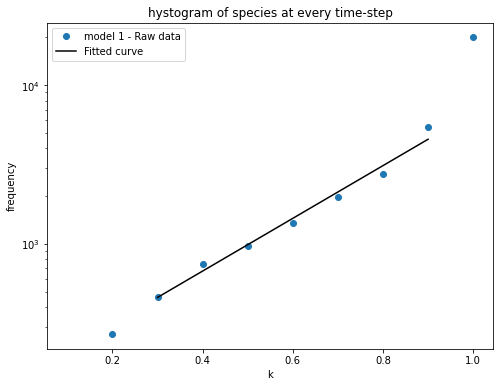

In [8]:
fig, ax = plt.subplots(figsize = [8,6])

ax.plot(k,heights[1,:,1],'o', label='model 1 - Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')

ax.set_title('hystogram of species at every time-step')
ax.set_xlabel('k')
ax.set_ylabel('frequency')
ax.set_yscale('log')

ax.legend();

In [9]:
p[0]

3.826350697897941

In [10]:
heights[0,:,0][2]

48.0

In [11]:
heights[0,:,0][8]

1199.0

In [12]:
heights[0,:,0]

array([0.0000e+00, 1.5000e+01, 4.8000e+01, 4.6000e+01, 1.2100e+02,
       1.7500e+02, 3.0700e+02, 5.7800e+02, 1.1990e+03, 3.9447e+04])

In [13]:
heights[0,:,0][8]/heights[0,:,0][2]

24.979166666666668

In [14]:
heights[1,:,1][8]/heights[1,:,1][2]

11.678879310344827

In [15]:
heights[3,:,0][8]/heights[3,:,0][2]

28.095890410958905

In [16]:
slope = np.empty(shape=(12,12))
mean = np.empty(12)
err = np.empty(12)

for z in range(12):
    for x in range(12):
        # Fit a polynomial of degree 1 (a linear function) to the data
        slope[x,z] = np.polyfit(k[2:9], np.log(heights[x,:,z][2:9]), 1)[0]
        
        
    mean[z] = np.mean(slope[:,z])
    err[z] = np.std(slope[:,z])/np.sqrt(12)
       

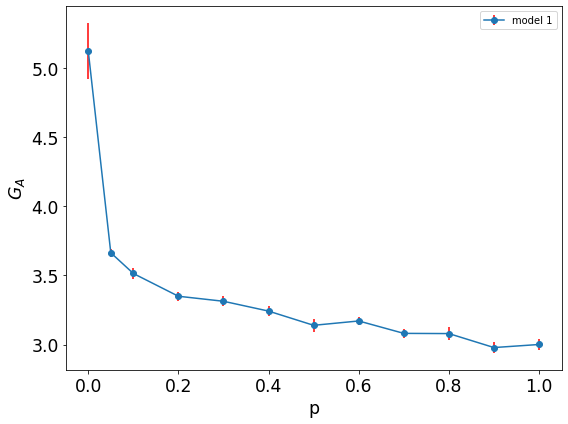

In [17]:
fig2, ax2 = plt.subplots(figsize = [8,6])

ax2.errorbar(edges, mean, yerr=err, fmt="o-", ecolor='r',label='model 1')

ax2.set_xlabel('p', fontsize='xx-large');
ax2.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax2.set_yticks(np.arange(0,1.3,0.2));
fig2.tight_layout();
ax2.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

In [18]:
diff = np.empty(shape=(12,12))
mean_d = np.empty(12)
err_d = np.empty(12)

for z in range(12):
    for x in range(12):
        # Fit a polynomial of degree 1 (a linear function) to the data
        diff[x,z] = heights[x,:,z][8]/heights[x,:,z][2]
        
        
    mean_d[z] = np.mean(diff[:,z])
    err_d[z] = np.std(diff[:,z])/np.sqrt(12)
       

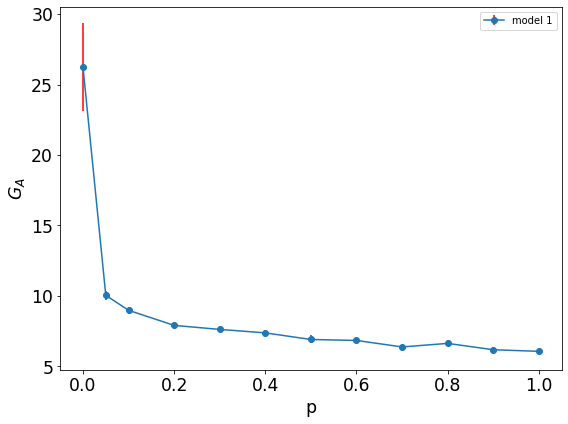

In [19]:
fig3, ax3 = plt.subplots(figsize = [8,6])

ax3.errorbar(edges, mean_d, yerr=err_d, fmt="o-", ecolor='r',label='model 1')

ax3.set_xlabel('p', fontsize='xx-large');
ax3.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax3.set_yticks(np.arange(0,1.3,0.2));
fig3.tight_layout();
ax3.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

In [20]:
mean_d

array([26.23705557, 10.04035938,  8.97499637,  7.90334194,  7.61815761,
        7.372575  ,  6.90297652,  6.83582549,  6.37244713,  6.62646586,
        6.17513145,  6.06179952])

In [21]:
compare = np.empty(11)
for i in range(1,12):
    compare[i-1] = mean_d[i-1]/mean_d[i]

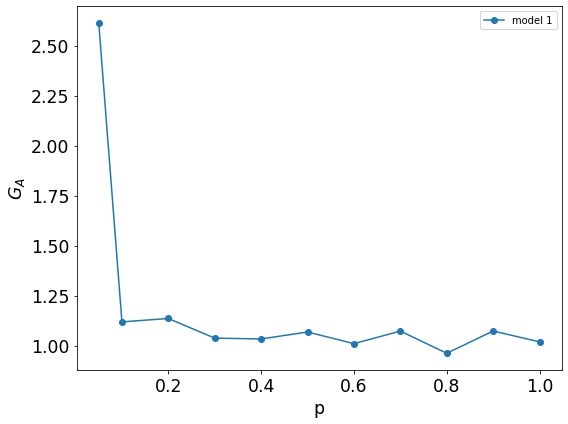

In [22]:
fig4, ax4 = plt.subplots(figsize = [8,6])

ax4.plot(edges[1:12], compare, "o-", label='model 1')

ax4.set_xlabel('p', fontsize='xx-large');
ax4.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax4.set_yticks(np.arange(0,1.3,0.2));
fig4.tight_layout();
ax4.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

# MODEL 2

In [23]:
edges = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
heights2 = np.empty(shape=(12,10,12))
y = 0
for i in edges:
    x = 0
    p = str(i)
    with open(r"C:\Users\TM\Documents\model 2\log-hystogram\hist_k p = %s.txt" % p, "r") as f:
        for line in f:
            if len([float(i[:-1]) for i in line.split()]) != 0:
                print(y,'\n')
                print(x,'\n')
                heights2[x,:,y] = [float(i[:-1]) for i in line.split()]
                
                x += 1
                
    y += 1 

0 

0 

0 

1 

0 

2 

0 

3 

0 

4 

0 

5 

0 

6 

0 

7 

0 

8 

0 

9 

0 

10 

0 

11 

1 

0 

1 

1 

1 

2 

1 

3 

1 

4 

1 

5 

1 

6 

1 

7 

1 

8 

1 

9 

1 

10 

1 

11 

2 

0 

2 

1 

2 

2 

2 

3 

2 

4 

2 

5 

2 

6 

2 

7 

2 

8 

2 

9 

2 

10 

2 

11 

3 

0 

3 

1 

3 

2 

3 

3 

3 

4 

3 

5 

3 

6 

3 

7 

3 

8 

3 

9 

3 

10 

3 

11 

4 

0 

4 

1 

4 

2 

4 

3 

4 

4 

4 

5 

4 

6 

4 

7 

4 

8 

4 

9 

4 

10 

4 

11 

5 

0 

5 

1 

5 

2 

5 

3 

5 

4 

5 

5 

5 

6 

5 

7 

5 

8 

5 

9 

5 

10 

5 

11 

6 

0 

6 

1 

6 

2 

6 

3 

6 

4 

6 

5 

6 

6 

6 

7 

6 

8 

6 

9 

6 

10 

6 

11 

7 

0 

7 

1 

7 

2 

7 

3 

7 

4 

7 

5 

7 

6 

7 

7 

7 

8 

7 

9 

7 

10 

7 

11 

8 

0 

8 

1 

8 

2 

8 

3 

8 

4 

8 

5 

8 

6 

8 

7 

8 

8 

8 

9 

8 

10 

8 

11 

9 

0 

9 

1 

9 

2 

9 

3 

9 

4 

9 

5 

9 

6 

9 

7 

9 

8 

9 

9 

9 

10 

9 

11 

10 

0 

10 

1 

10

In [24]:
k = np.linspace(0.1,1,10)
k

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [25]:
# Fit a polynomial of degree 1 (a linear function) to the data
p = np.polyfit(k[2:9], np.log(heights2[1,:,1][2:9]), 1)

In [26]:
heights2[1,:,1][2:9]

array([ 646.,  758.,  894., 1459., 2205., 3000., 5393.])

In [27]:
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(k[2:9]), np.max(k[2:9]), 100)
y_fitted = a * np.exp(b * x_fitted)

In [28]:
a

182.56973420516744

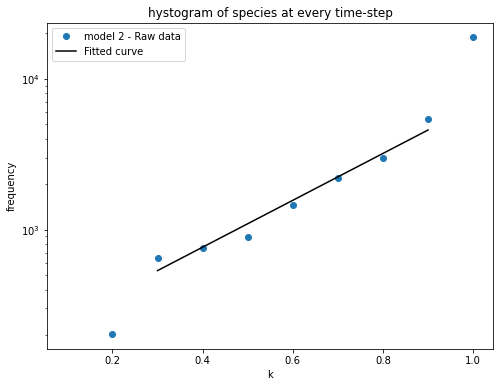

In [29]:
fig5, ax5 = plt.subplots(figsize = [8,6])

ax5.plot(k,heights2[1,:,1],'o', label='model 2 - Raw data')
ax5.plot(x_fitted, y_fitted, 'k', label='Fitted curve')

ax5.set_title('hystogram of species at every time-step')
ax5.set_xlabel('k')
ax5.set_ylabel('frequency')
ax5.set_yscale('log')

ax5.legend();

In [30]:
slope2 = np.empty(shape=(12,12))
mean2 = np.empty(12)
err2 = np.empty(12)

for z in range(12):
    for x in range(12):
        # Fit a polynomial of degree 1 (a linear function) to the data
        slope2[x,z] = np.polyfit(k[2:9], np.log(heights2[x,:,z][2:9]), 1)[0]
        
        
    mean2[z] = np.mean(slope2[:,z])
    err2[z] = np.std(slope2[:,z])/np.sqrt(12)

 

In [31]:
slope2

array([[4.5745737 , 3.65539863, 3.36305739, 3.2245523 , 3.19023573,
        3.00830428, 2.99279956, 3.08194248, 2.96561223, 2.67825162,
        3.08689752, 3.71428751],
       [4.88663444, 3.57868505, 3.4752042 , 3.40117493, 3.17522567,
        2.83795539, 2.67016887, 2.72549487, 2.87494499, 2.59314757,
        3.13320636, 3.44371239],
       [4.95354904, 3.51554327, 3.69344078, 3.47072414, 3.02954084,
        2.80513658, 3.01500661, 2.91057541, 2.94030153, 2.67216049,
        2.95859632, 3.44834426],
       [5.98862821, 3.52864508, 3.46460613, 3.48680877, 3.40102788,
        2.72607814, 2.95069643, 2.98444379, 2.91600269, 3.13813905,
        3.20108966, 3.34321555],
       [6.40937703, 3.64194737, 3.49407239, 3.15349159, 2.87936611,
        3.25690502, 3.00778234, 2.98532026, 2.98028412, 2.74973968,
        3.09534478, 3.33827499],
       [4.71488541, 3.85468202, 3.56292143, 2.93288068, 2.74147943,
        3.08952608, 2.61107978, 2.61069392, 2.96803616, 2.60265527,
        2.85343509,

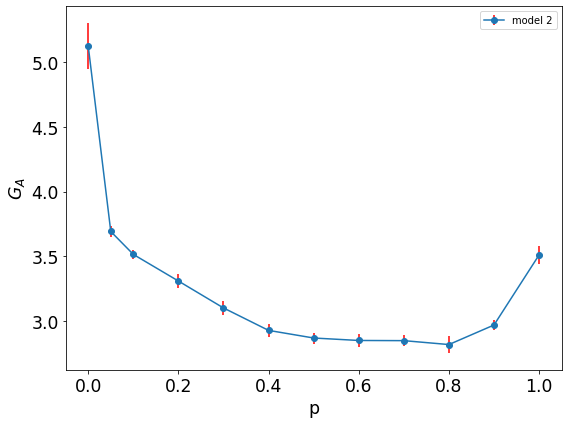

In [32]:
fig6, ax6 = plt.subplots(figsize = [8,6])

ax6.errorbar(edges, mean2, yerr=err2, fmt="o-", ecolor='r',label='model 2')

ax6.set_xlabel('p', fontsize='xx-large');
ax6.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax6.set_yticks(np.arange(0,1.3,0.2));
fig6.tight_layout();
ax6.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

In [33]:
mean2

array([5.12277477, 3.69158758, 3.51461068, 3.30889324, 3.10098272,
       2.92758965, 2.86874035, 2.84973491, 2.84838538, 2.8181583 ,
       2.96904938, 3.51011306])

In [34]:
diff2 = np.empty(shape=(12,12))
mean_d2 = np.empty(12)
err_d2 = np.empty(12)

for z in range(12):
    for x in range(12):
        # Fit a polynomial of degree 1 (a linear function) to the data
        diff2[x,z] = heights2[x,:,z][8]/heights2[x,:,z][2]
        
        
    mean_d2[z] = np.mean(diff2[:,z])
    err_d2[z] = np.std(diff2[:,z])/np.sqrt(12)
      

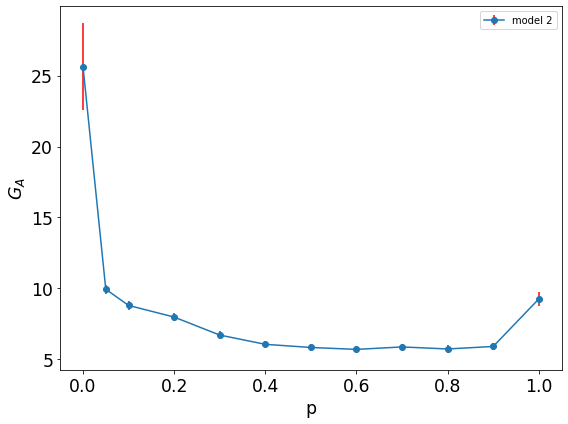

In [35]:
fig7, ax7 = plt.subplots(figsize = [8,6])

ax7.errorbar(edges, mean_d2, yerr=err_d2, fmt="o-", ecolor='r',label='model 2')

ax7.set_xlabel('p', fontsize='xx-large');
ax7.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax7.set_yticks(np.arange(0,1.3,0.2));
fig7.tight_layout();
ax7.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

In [36]:
mean_d

array([26.23705557, 10.04035938,  8.97499637,  7.90334194,  7.61815761,
        7.372575  ,  6.90297652,  6.83582549,  6.37244713,  6.62646586,
        6.17513145,  6.06179952])

In [37]:
compare2 = np.empty(11)
for i in range(1,12):
    compare2[i-1] = mean_d2[i-1]/mean_d2[i]

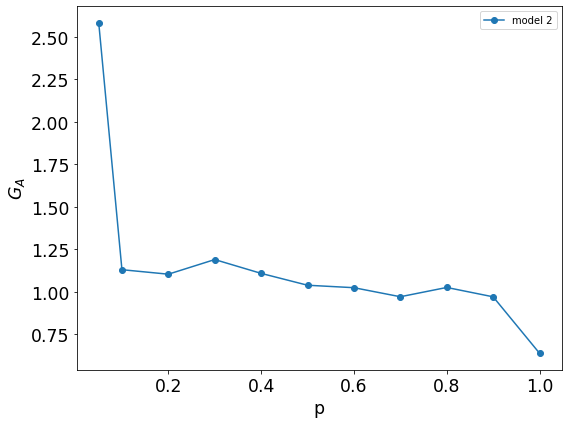

In [38]:
fig8, ax8 = plt.subplots(figsize = [8,6])

ax8.plot(edges[1:12], compare2, "o-", label='model 2')

ax8.set_xlabel('p', fontsize='xx-large');
ax8.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax8.set_yticks(np.arange(0,1.3,0.2));
fig8.tight_layout();
ax8.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

# Both models

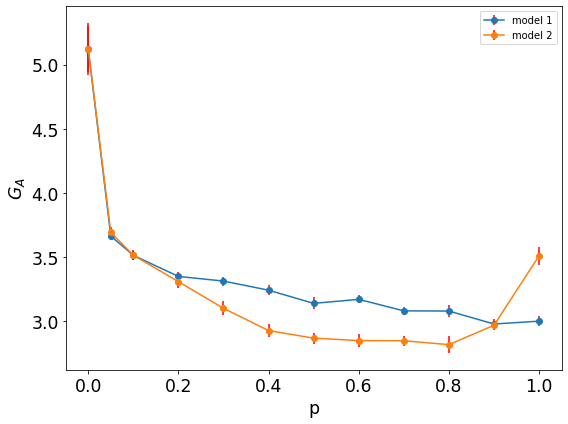

In [39]:
fig9, ax9 = plt.subplots(figsize = [8,6])

ax9.errorbar(edges, mean, yerr=err, fmt="o-", ecolor='r',label='model 1')
ax9.errorbar(edges, mean2, yerr=err2, fmt="o-", ecolor='r',label='model 2')

ax9.set_xlabel('p', fontsize='xx-large');
ax9.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax9.set_yticks(np.arange(0,1.3,0.2));
fig9.tight_layout();
ax9.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

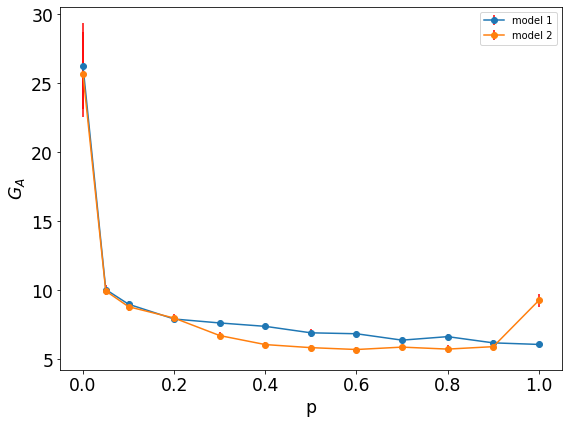

In [40]:
fig10, ax10 = plt.subplots(figsize = [8,6])

ax10.errorbar(edges, mean_d, yerr=err_d, fmt="o-", ecolor='r',label='model 1')
ax10.errorbar(edges, mean_d2, yerr=err_d2, fmt="o-", ecolor='r',label='model 2')

ax10.set_xlabel('p', fontsize='xx-large');
ax10.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax10.set_yticks(np.arange(0,1.3,0.2));
fig10.tight_layout();
ax10.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

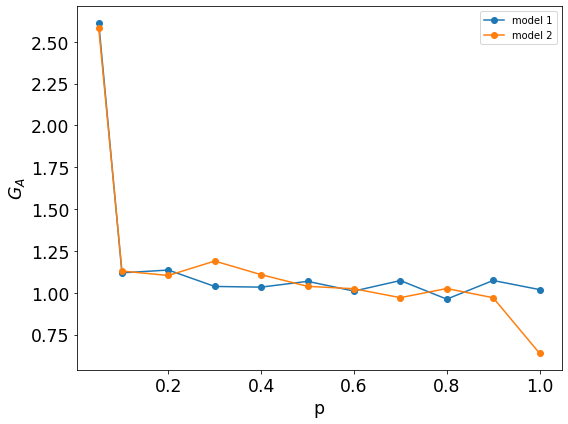

In [41]:
fig11, ax11 = plt.subplots(figsize = [8,6])

ax11.plot(edges[1:12], compare, "o-", label='model 1')
ax11.plot(edges[1:12], compare2, "o-", label='model 2')

ax11.set_xlabel('p', fontsize='xx-large');
ax11.set_ylabel('$G_{A}$', fontsize='xx-large');   
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax11.set_yticks(np.arange(0,1.3,0.2));
fig11.tight_layout();
ax11.legend(frameon=True, title_fontsize = 'x-large', loc = 'best');

In [42]:
invslope = np.empty(shape=(12,12))
invmean = np.empty(12)
inverr = np.empty(12)
invslope2 = np.empty(shape=(12,12))
invmean2 = np.empty(12)
inverr2 = np.empty(12)

for z in range(12):
    for x in range(12):
        # Fit a polynomial of degree 1 (a linear function) to the data
        invslope[x,z] = 1/np.polyfit(k[2:9], np.log(heights[x,:,z][2:9]), 1)[0]
        invslope2[x,z] = 1/np.polyfit(k[2:9], np.log(heights2[x,:,z][2:9]), 1)[0]
        
        
    invmean[z] = np.mean(invslope[:,z])
    inverr[z] = np.std(invslope[:,z])/np.sqrt(12)
    invmean2[z] = np.mean(invslope2[:,z])
    inverr2[z] = np.std(invslope2[:,z])/np.sqrt(12)

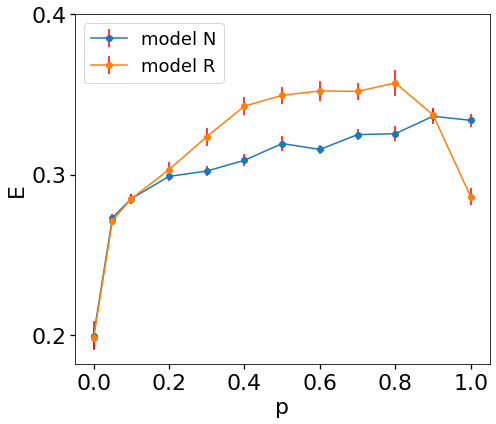

In [43]:
fig12, ax12 = plt.subplots(figsize = [7,6])

ax12.errorbar(edges, invmean, yerr=inverr, fmt="o-", ecolor='r',label='model N')
ax12.errorbar(edges, invmean2, yerr=inverr2, fmt="o-", ecolor='r',label='model R')

ax12.set_xlabel('p', fontsize=22);
ax12.set_ylabel('E', fontsize=22);   
plt.xticks(fontsize = 22);
plt.yticks(fontsize = 22);
ax12.set_yticks(np.arange(0.2,0.41,0.1));
ax12.tick_params(axis='both', width=1.3, length=5);
ax12.legend(frameon=True, fontsize = 18, loc = 'upper left');
fig12.tight_layout();
#fig12.savefig("Elimination factor.pdf");



In [44]:
#model R

In [45]:
k_t2 = np.loadtxt(r"C:\Users\TM\Documents\model 2\log-hystogram\k hist p = 0.2 repet = 8.txt")


In [46]:
# Fit a polynomial of degree 1 (a linear function) to the data
Hist_k2,Edges_k2 = np.histogram(k_t2,bins=list(np.linspace(0,1,11)))

p2 = np.polyfit(k[2:9], np.log(Hist_k2[2:9]), 1)

a2 = np.exp(p2[1])
b2 = p2[0]
x_fitted2 = np.linspace(np.min(k[2:9]), np.max(k[2:9]), 100)
y_fitted2 = a2 * np.exp(b2 * x_fitted2)

In [47]:
b2

3.601741630954692

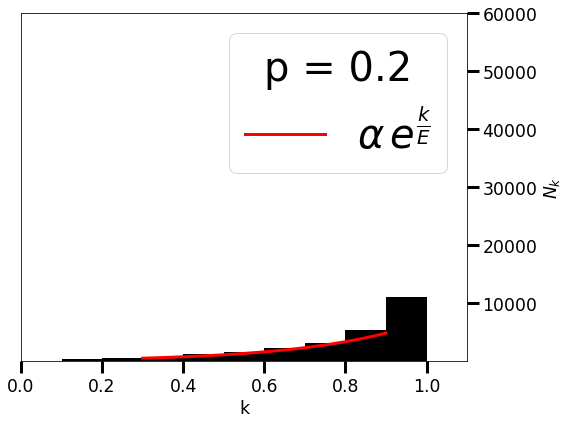

In [48]:
# Histogram of k (every timestep counts)
fig33, ax33 = plt.subplots(figsize = [8,6]);
#ax33.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
ax33.yaxis.set_label_position("right");
ax33.yaxis.tick_right();
ax33.set_xlabel('k', fontsize='xx-large');
ax33.set_ylabel('$N_k$', fontsize='xx-large');
ax33.hist(k_t2, bins=list(np.linspace(0,1,11)), color='black');
ax33.set_xlim([0.0,1.1]);

plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax33.invert_xaxis();
ax33.tick_params(axis='both', width=3, length=12);
ax33.plot(x_fitted2, y_fitted2, 'r', linewidth = 3, label=r'$α \, e^{\frac{k}{E}}$');
ax33.legend(title ='p = 0.2',frameon=True, fontsize = 40, title_fontsize = 40, loc = 'best');
#ax33.set_yscale('log');
ax33.set_ylim([30,60001]);
fig33.tight_layout();
#fig33.savefig("fig3 side plots p = 0_2 modelR.pdf");
#ax33.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)


In [49]:
species_count2 = np.unique(k_t2)[np.isnan(np.unique(k_t2)) == False]

In [50]:
# Fit a polynomial of degree 1 (a linear function) to the data
Hist_k2,Edges_k2 = np.histogram(species_count2,bins=list(np.linspace(0,1,11)))

p2 = np.polyfit(k[2:10], Hist_k2[2:10], 1)

a2 = p2[1]
b2 = p2[0]
x_fitted2 = np.linspace(np.min(k[2:10]), np.max(k[2:10]), 100)
y_fitted2 = a2 + b2 * x_fitted2

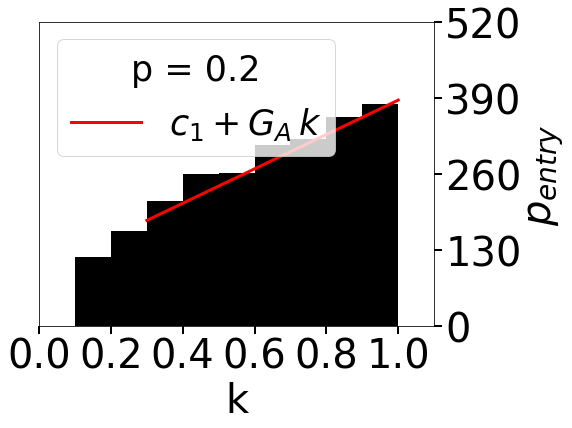

In [51]:
# Histogram of k 
fig33, ax33 = plt.subplots(figsize = [8,6]);
ax33.yaxis.set_label_position("right");
ax33.yaxis.tick_right();
#ax33.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
ax33.set_xlabel('k', fontsize=40);
ax33.set_ylabel('$p_{entry}$', fontsize=40);
ax33.hist(species_count2, bins=list(np.linspace(0,1,11)), color='black');
ax33.set_xlim([0.0,1.1]);
ax33.set_ylim([0.0,520]);
ax33.set_yticks(np.arange(0,521,130));
#ax33.legend(title='p = '+probability, frameon=False, title_fontsize = 'x-large', loc = 'best');
plt.xticks(fontsize = 40);
plt.yticks(fontsize = 40);
fig33.tight_layout();
#ax33.invert_xaxis();
ax33.tick_params(axis='both', width=2, length=7.5);
ax33.plot(x_fitted2, y_fitted2, 'r', linewidth = 3, label=r'$c_{1} + G_{A} \, k$');
ax33.legend(title ='p = 0.2',frameon=True, fontsize = 35, title_fontsize = 35, loc = 'upper left');
#fig33.savefig("p entry - fig supplementary p = 0_2.pdf");


In [52]:
len(species_count2)

2383

In [53]:
hist_k2,edges_k2 = np.histogram(species_count2,bins=list(np.linspace(0,1,11)))
print(hist_k2)

[  0 117 163 214 259 262 310 320 358 380]


In [54]:
print(hist_k2/len(species_count2))

[0.         0.04909778 0.06840117 0.08980277 0.10868653 0.10994545
 0.13008812 0.13428452 0.1502308  0.15946286]


In [55]:
k_t = np.loadtxt(r"C:\Users\TM\Documents\model 2\log-hystogram\k hist p = 0 repet = 5.txt")


In [56]:
# Fit a polynomial of degree 1 (a linear function) to the data
Hist_k1,Edges_k1 = np.histogram(k_t,bins=list(np.linspace(0,1,11)))

p = np.polyfit(k[2:9], np.log(Hist_k1[2:9]), 1)

a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(k[2:9]), np.max(k[2:9]), 100)
y_fitted = a * np.exp(b * x_fitted)

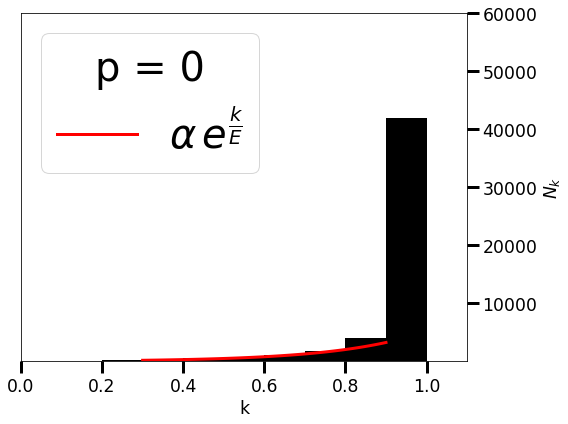

In [57]:
# Histogram of k (every timestep counts)
fig32, ax32 = plt.subplots(figsize = [8,6]);
#ax32.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
ax32.yaxis.set_label_position("right");
ax32.yaxis.tick_right();
ax32.set_xlabel('k', fontsize='xx-large');
ax32.set_ylabel('$N_k$', fontsize='xx-large');
ax32.hist(k_t, bins=list(np.linspace(0,1,11)), color='black');
ax32.set_xlim([0.0,1.1]);

plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
#ax32.invert_xaxis();
ax32.tick_params(axis='both', width=3, length=12);
ax32.plot(x_fitted, y_fitted, 'r', linewidth = 3, label=r'$α \, e^{\frac{k}{E}}$');
ax32.legend(title ='p = 0',frameon=True, fontsize = 40, title_fontsize = 40, loc = 'best');
#ax32.set_yscale('log');
ax32.set_ylim([30,60001]);
fig32.tight_layout();
#fig32.savefig("fig3 side plots p = 0 modelR2.pdf");
#ax32.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)


In [58]:
species_count1 = np.unique(k_t)[np.isnan(np.unique(k_t)) == False]

In [59]:
# Fit a polynomial of degree 1 (a linear function) to the data
Hist_k1,Edges_k1 = np.histogram(species_count1,bins=list(np.linspace(0,1,11)))

p1 = np.polyfit(k[2:10], Hist_k1[2:10], 1)

a1 = p1[1]
b1 = p1[0]
x_fitted1 = np.linspace(np.min(k[2:10]), np.max(k[2:10]), 100)
y_fitted1 = a1 + b1 * x_fitted1

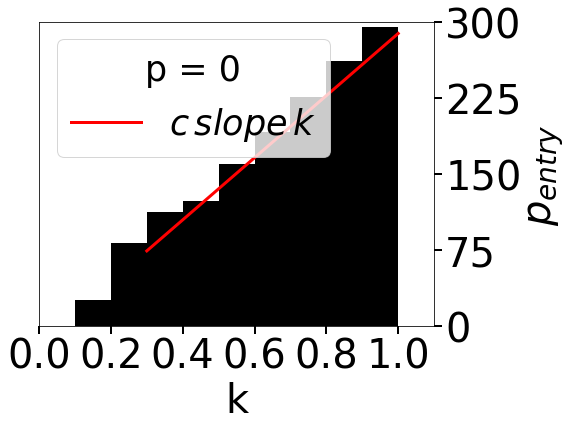

In [73]:
# Histogram of k 
fig32, ax32 = plt.subplots(figsize = [8,6]);
ax32.yaxis.set_label_position("right");
ax32.yaxis.tick_right();
#ax32.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
ax32.set_xlabel('k', fontsize=40);
ax32.set_ylabel('$p_{entry}$', fontsize=40);
ax32.hist(species_count1, bins=list(np.linspace(0,1,11)), color='black');
ax32.set_xlim([0.0,1.1]);
ax32.set_ylim([0.0,300]);
ax32.set_yticks(np.arange(0,301,75));
#ax32.legend(title='p = '+probability, frameon=False, title_fontsize = 'x-large', loc = 'best');
plt.xticks(fontsize = 40);
plt.yticks(fontsize = 40);
fig32.tight_layout();
#ax32.invert_xaxis();
ax32.tick_params(axis='both', width=2, length=7.5);
ax32.plot(x_fitted1, y_fitted1, 'r', linewidth = 3, label=r'$c\, slope \, k$');
ax32.legend(title ='p = 0',frameon=True, fontsize = 35, title_fontsize = 35, loc = 'upper left');
fig32.savefig("p entry - fig supplementary p = 0 new.pdf");



In [61]:
len(species_count1)

1475

In [62]:
hist_k1,edges_k1 = np.histogram(species_count1,bins=list(np.linspace(0,1,11)))
print(hist_k1)

[  0  25  82 112 123 160 191 226 261 295]


In [63]:
print(hist_k1/len(species_count1))

[0.         0.01694915 0.05559322 0.0759322  0.08338983 0.10847458
 0.12949153 0.15322034 0.17694915 0.2       ]


In [64]:
#model N

In [65]:
k_t3 = np.loadtxt(r"C:\Users\TM\Documents\model 1\log-hystogram\k hist p = 0.2 repet = 3.txt")

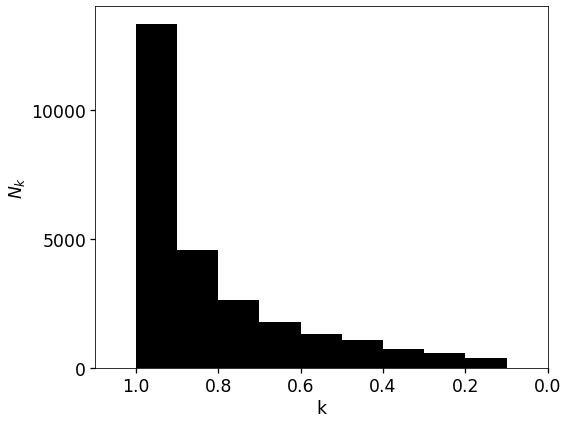

In [66]:
# Histogram of k (every timestep counts)
fig34, ax34 = plt.subplots(figsize = [8,6]);
#ax34.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
#ax34.yaxis.set_label_position("right");
#ax34.yaxis.tick_right();
ax34.set_xlabel('k', fontsize='xx-large');
ax34.set_ylabel('$N_k$', fontsize='xx-large');
ax34.hist(k_t3, bins=list(np.linspace(0,1,11)), color='black');
ax34.set_xlim([0.0,1.1]);

plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
ax34.invert_xaxis();
ax34.tick_params(axis='both', width = 1.3, length=5);

#ax34.legend(title ='p = 0.2',frameon=True, fontsize = 40, title_fontsize = 40, loc = 'best');
#ax34.set_yscale('log');
ax34.set_yticks(np.arange(0,12001,5000));
fig34.tight_layout();
#fig34.savefig("Number of bacteria per k per 10000 steps - model 1.png");
#ax34.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)

In [67]:
species_count3 = np.unique(k_t3)[np.isnan(np.unique(k_t3)) == False]

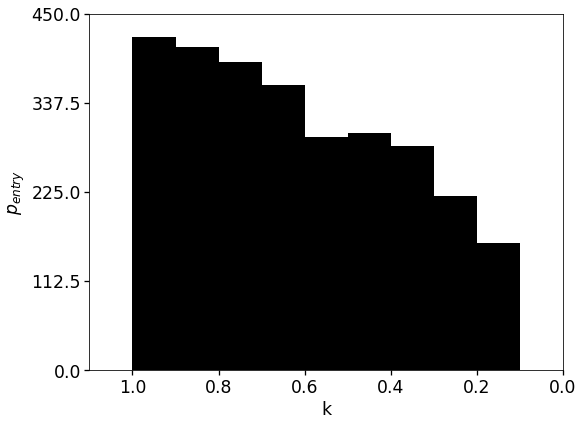

In [68]:
# Histogram of k 
fig35, ax35 = plt.subplots(figsize = [8,6]);
#ax32.set_title('Distribution of k', fontsize='x-large',fontweight='bold');
ax35.set_xlabel('k', fontsize='xx-large');
ax35.set_ylabel('$p_{entry}$', fontsize='xx-large');
ax35.hist(species_count3, bins=list(np.linspace(0,1,11)), color='black');
ax35.set_xlim([0.0,1.1]);
#ax35.set_ylim([0.0,400]);
ax35.set_yticks(np.arange(0,451,112.5));
#ax35.legend(title='p = '+probability, frameon=False, title_fontsize = 'x-large', loc = 'best');
plt.xticks(fontsize = 'xx-large');
plt.yticks(fontsize = 'xx-large');
fig35.tight_layout();
ax35.invert_xaxis();
ax35.tick_params(axis='both', width=1.3, length=5);
#fig35.savefig("p entry model1.png");


In [69]:
len(species_count3)

2836

In [70]:
hist_k3,edges_k3 = np.histogram(species_count3,bins=list(np.linspace(0,1,11)))
print(hist_k3)

[  0 161 220 283 299 295 360 389 408 421]


In [71]:
print(hist_k3/len(species_count3))

[0.         0.0567701  0.07757405 0.09978843 0.10543018 0.10401975
 0.12693935 0.13716502 0.1438646  0.14844852]
